In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.signal import convolve2d
import numpy as np
import matplotlib.image as mpimg

(512, 512, 3)


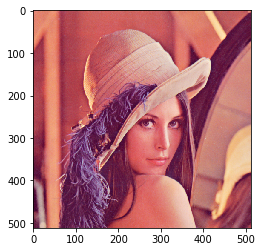

In [2]:
# load the famous Lena image
img = mpimg.imread('data/lena.png')
print(img.shape)

# original image
plt.imshow(img)
plt.show()

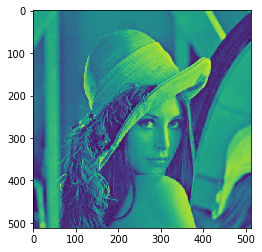

In [3]:
# make it B&W
bw = img.mean(axis=2)
plt.imshow(bw)
plt.show()

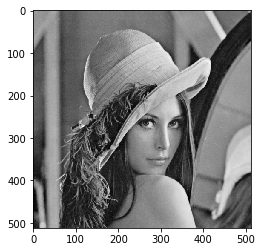

In [4]:
plt.imshow(bw, cmap='gray')
plt.show()

In [5]:
# create a 2-dimentional Gaussian filter
N1 = N2 = 20
center = N1/2

W = np.zeros((N1, N2))
for i in range(N1):
    for j in range(N2):
        dist = (i - center)**2 + (j - center)**2  # square distance from the center
        W[i, j] = np.exp(-dist / 50.)
        
W /= W.sum() # normalize the kernel

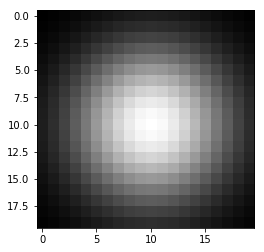

In [6]:
# let's see what the filter looks like
plt.imshow(W, cmap='gray')
plt.show()

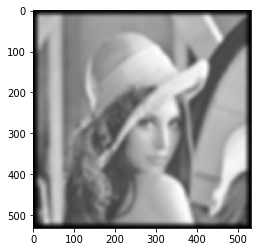

In [7]:
# now the convolution
out = convolve2d(bw, W)
plt.imshow(out, cmap='gray')
plt.show()

In [8]:
print(out.shape)
# what's that weird black stuff on the edges? let's check the size of output
# 512 --> 531
# after convolution, the output signal is N1 (or N2) - 1

(531, 531)


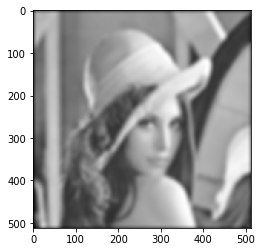

(512, 512)


In [9]:
# we can also just make the output the same size as the input
out = convolve2d(bw, W, mode='same')
plt.imshow(out, cmap='gray')
plt.show()
print(out.shape)

(512, 512, 3)


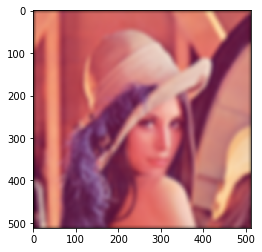

In [10]:
# in color
out3 = np.zeros(img.shape)
print(out3.shape)
for i in range(3):
    out3[:,:,i] = convolve2d(img[:,:,i], W, mode='same')
out3 /= out3.max() # can also do this if you didn't normalize the kernel
plt.imshow(out3)
plt.show()          # does not look like anything